In [1]:
import quandl as qndl
import datetime as dtime
import numpy as nmpy

# Getting the Goldman Sachs stock dataset for a 6-month period:
qndl.ApiConfig.api_key = "1j7PHpz1kT9sozHM3f6e"
stock_prices_df = qndl.get("EOD/GS", start_date = "2018-08-05", end_date = dtime.date.today(), collapse = "daily")
print(stock_prices_df)

              Open      High       Low   Close      Volume  Dividend  Split  \
Date                                                                          
2018-08-06  234.14  236.9800  234.0300  235.93   2259700.0       0.0    1.0   
2018-08-07  237.25  239.4600  236.4900  237.83   2399530.0       0.0    1.0   
2018-08-08  238.12  239.1600  236.2300  236.37   2522353.0       0.0    1.0   
2018-08-09  236.35  236.8450  233.3900  233.78   2952021.0       0.0    1.0   
2018-08-10  230.97  231.4550  228.1100  229.61   3863732.0       0.0    1.0   
2018-08-13  229.49  229.8900  226.5700  226.86   2662772.0       0.0    1.0   
2018-08-14  227.35  230.3700  227.3000  229.56   2357141.0       0.0    1.0   
2018-08-15  229.35  231.5400  228.3100  229.25   3218716.0       0.0    1.0   
2018-08-16  230.67  233.2900  230.4500  233.00   2435929.0       0.0    1.0   
2018-08-17  232.51  233.7200  231.6400  233.38   2107233.0       0.0    1.0   
2018-08-20  234.13  235.9750  234.0750  235.78   260

In [2]:

from sklearn.model_selection import train_test_split

stock_prices_df = stock_prices_df.reset_index() # Assigned indices correspond to individual rows in the dataframe
out_stockprices = stock_prices_df['Adj_Close'].tolist() #The Adj_Close column of the stock dataframe is converted to a list
in_datetime = stock_prices_df.index.tolist() #Date can be represented in terms of the indexed rows, where 0 refers to 2018-06-01

train_date,test_date,train_stock_prices, test_stock_prices = ([] for i in range(4))

train_date, test_date, train_stock_prices, test_stock_prices = train_test_split(in_datetime, out_stockprices, train_size = 0.75, test_size = 0.25) #The training and testing datasets are split accordingly

#The lists are converted to numpy arrays
train_date = nmpy.array(train_date)
test_date = nmpy.array(test_date)
train_stock_prices = nmpy.array(train_stock_prices)
test_stock_prices = nmpy.array(test_stock_prices)

#The numpy arrays are converted to 1D vectors:
num_train_days = len(train_date)
num_test_days = len(test_date)
train_date= nmpy.reshape(train_date, (num_train_days, 1))
test_date = nmpy.reshape(test_date, (num_test_days, 1))

#train_date = train_date.reshape(-1, 1)
#test_date = test_date.reshape(-1, 1)
#train_stock_prices = train_stock_prices.reshape(num_train_stockprices, 1)
#test_stock_prices = test_stock_prices.reshape(num_test_stockprices, 1)

print(train_date)
print(test_date)
print(train_stock_prices)
print(test_stock_prices)


[[64]
 [ 4]
 [51]
 [14]
 [34]
 [20]
 [29]
 [ 0]
 [43]
 [12]
 [23]
 [33]
 [36]
 [71]
 [42]
 [11]
 [47]
 [19]
 [40]
 [24]
 [ 1]
 [26]
 [77]
 [ 5]
 [30]
 [53]
 [48]
 [70]
 [ 3]
 [54]
 [ 6]
 [25]
 [35]
 [56]
 [22]
 [39]
 [15]
 [18]
 [ 8]
 [72]
 [ 9]
 [37]
 [68]
 [74]
 [27]
 [21]
 [32]
 [59]
 [46]
 [52]
 [17]
 [55]
 [50]
 [ 2]
 [57]
 [31]
 [63]
 [44]]
[[10]
 [38]
 [65]
 [61]
 [45]
 [60]
 [58]
 [66]
 [16]
 [49]
 [62]
 [67]
 [75]
 [13]
 [76]
 [69]
 [28]
 [73]
 [ 7]
 [41]]
[228.72       228.85158547 228.28       234.33341866 232.9
 237.66       227.89       235.15071016 225.71       238.54944674
 233.91       235.34       228.88       202.49       227.48
 237.86172585 212.97       237.81       226.07       231.91
 237.04443435 228.15       189.1        226.11066887 228.89
 226.96       213.87       205.05       233.00781173 221.6
 228.80175062 230.21       232.5        209.18       234.52
 225.33       241.79867878 239.4        232.23038811 203.74
 232.60913295 227.74       222.65       198.22

In [3]:
from sklearn.linear_model import LinearRegression as LinReg

lin_reg = LinReg()
lin_reg.fit(train_date, train_stock_prices)
pred_stock_prices = lin_reg.predict(test_date)

print(pred_stock_prices)


[236.76626504 225.29742697 214.23819026 215.8765957  222.43021745
 216.28619706 217.10539978 213.8285889  234.30865689 220.79181201
 215.46699434 213.41898754 210.14217666 235.53746097 209.7325753
 212.59978482 229.39344057 210.96137938 237.99506912 224.06862289]


In [4]:
print(lin_reg.score(test_date, test_stock_prices)*100)

44.928705408131485


In [5]:
import matplotlib.pyplot as plot

#Linear Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_stock_prices, color = "green", label = "Linear Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Linear Regression")
plot.legend()
plot.show()

<Figure size 640x480 with 1 Axes>

In [6]:
from sklearn.ensemble import RandomForestRegressor

rand_for_reg = RandomForestRegressor(n_estimators = 500, random_state = 42)
rand_for_reg.fit(train_date, train_stock_prices)
pred_stock_prices = rand_for_reg.predict(test_date)

print(pred_stock_prices)

[233.87370216 227.24302    227.54956    219.06302    222.52008
 215.90216    213.93694    226.44806    240.91860025 216.0129
 227.48976    222.68806    196.54686    237.63899073 192.67998
 216.05106    228.28746    201.96738    229.64013222 226.34064   ]


In [7]:
print(rand_for_reg.score(test_date, test_stock_prices)*100)

91.7830185280873


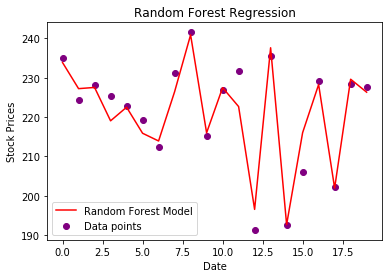

In [8]:
import matplotlib.pyplot as plot

#Random Forest Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "purple", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_stock_prices, color = "red", label = "Random Forest Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Random Forest Regression")
plot.legend()
plot.show()

In [9]:
from sklearn.svm import SVR

lin_svr = SVR(kernel = 'linear', C = 1000) #linear support vector regression model
lin_svr.fit(train_date, train_stock_prices)
pred_lin_stock = lin_svr.predict(test_date)

print(pred_lin_stock)

[235.73548307 226.6210322  217.83209744 219.13416185 224.34241949
 219.45967796 220.11071016 217.50658134 233.78238646 223.04035508
 218.80864575 217.18106524 214.57693641 234.75893477 214.25142031
 216.53003303 229.87619323 215.22796862 236.71203138 225.6444839 ]


In [10]:
print(lin_svr.score(test_date, test_stock_prices)*100)

41.711393172307176


In [11]:
from sklearn.svm import SVR

poly_svr = SVR(kernel = 'poly', C = 1000, degree = 2) #polynomial support vector regression model
poly_svr.fit(train_date, train_stock_prices)
pred_poly_stock = poly_svr.predict(test_date)

print(pred_poly_stock)

[234.58493716 229.66368193 219.48062796 221.32609839 227.5362596
 221.7691564  222.63330359 219.00095648 234.01371974 226.15948004
 220.87571997 218.51395315 214.35432333 234.3322832  213.80142111
 217.5179891  232.08036799 215.43817038 234.77168131 228.79586882]


In [12]:
print(poly_svr.score(test_date, test_stock_prices)*100)

42.662480283919976


In [13]:
from sklearn.svm import SVR

rbf_svr = SVR(kernel = 'rbf', C = 1000, gamma = 0.1) #polynomial support vector regression model
rbf_svr.fit(train_date, train_stock_prices)
pred_rbf_stock = rbf_svr.predict(test_date)

print(pred_rbf_stock)

[234.71912304 225.94085783 227.08105077 217.53677541 220.34218241
 213.29824346 216.0398141  227.49826758 243.05410684 216.81811356
 225.1902822  227.4586843  191.88871906 236.30066234 187.96778906
 213.23167694 228.10049131 203.02976573 231.5378513  227.11806535]


In [14]:
print(rbf_svr.score(test_date, test_stock_prices)*100)

93.35188905670448


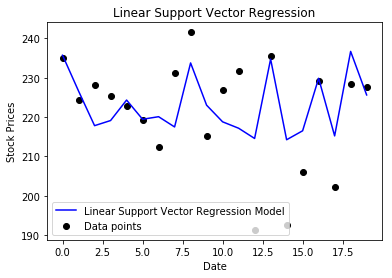

In [15]:
import matplotlib.pyplot as plot

#Linear Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "black", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_lin_stock, color = "blue", label = "Linear Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Linear Support Vector Regression")
plot.legend()
plot.show()

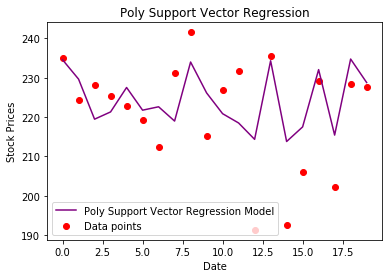

In [16]:
import matplotlib.pyplot as plot

#Poly Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "red", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_poly_stock, color = "purple", label = "Poly Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Poly Support Vector Regression")
plot.legend()
plot.show()

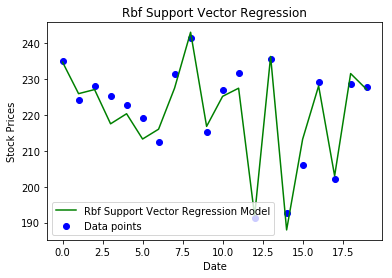

In [17]:
import matplotlib.pyplot as plot

#Rbf Support Vector Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_rbf_stock, color = "green", label = "Rbf Support Vector Regression Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Rbf Support Vector Regression")
plot.legend()
plot.show()